In [1]:
import os

project_dir = os.getcwd()
data_dir = os.path.join(project_dir, "data")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Questions

In [3]:
questions_df = pd.read_csv(os.path.join(data_dir, "Questions.csv"), encoding="ISO-8859-1")

#### Remove duplicates

In [4]:
questions_df = questions_df.drop_duplicates()

In [5]:
print(f"Number of rows: {questions_df.shape[0]}")
print(f"Number of columns: {questions_df.shape[1]}")

Number of rows: 1264216
Number of columns: 7


In [6]:
questions_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


Title is in plain text, while Body is in HTML format

### Tags

In [7]:
tags_df = pd.read_csv(os.path.join(data_dir, "Tags.csv"), encoding="ISO-8859-1")

#### Remove duplicates

In [8]:
tags_df = tags_df.drop_duplicates()

In [9]:
print(f"Number of rows: {tags_df.shape[0]}")
print(f"Number of columns: {tags_df.shape[1]}")

Number of rows: 3750993
Number of columns: 2


In [10]:
tags_df.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


### Tag analysis

In [11]:
tag_value_counts = tags_df["Tag"].value_counts()

#### Top 10 tags with most questions

In [12]:
top_ten_tags = tag_value_counts.head(10)
top_ten_tags

Tag
javascript    124155
java          115212
c#            101186
php            98808
android        90659
jquery         78542
python         64601
html           58976
c++            47591
ios            47009
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'javascript'),
  Text(1, 0, 'java'),
  Text(2, 0, 'c#'),
  Text(3, 0, 'php'),
  Text(4, 0, 'android'),
  Text(5, 0, 'jquery'),
  Text(6, 0, 'python'),
  Text(7, 0, 'html'),
  Text(8, 0, 'c++'),
  Text(9, 0, 'ios')])

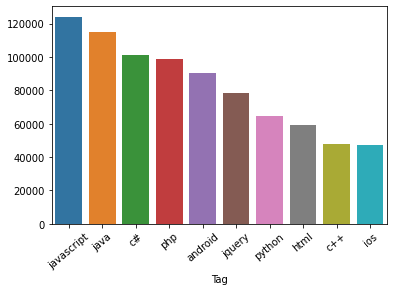

In [13]:
sns.barplot(x=top_ten_tags.index, y=top_ten_tags.values)
plt.xticks(rotation=40)

#### Top 50 tags with most questions

In [14]:
top_fifty_tags = tag_value_counts.head(50)
top_fifty_tags

Tag
javascript        124155
java              115212
c#                101186
php                98808
android            90659
jquery             78542
python             64601
html               58976
c++                47591
ios                47009
mysql              42464
css                42308
sql                35782
asp.net            29970
objective-c        26922
ruby-on-rails      25789
.net               24059
c                  23238
iphone             21539
angularjs          20345
arrays             19799
sql-server         18160
json               17669
ruby               17013
r                  15701
ajax               15629
regex              15349
xml                14763
node.js            14525
asp.net-mvc        14284
linux              13395
django             12818
wpf                12365
database           11860
swift              11832
xcode              10633
string             10427
excel              10384
vb.net             10286
windows            10

<AxesSubplot:xlabel='Tag'>

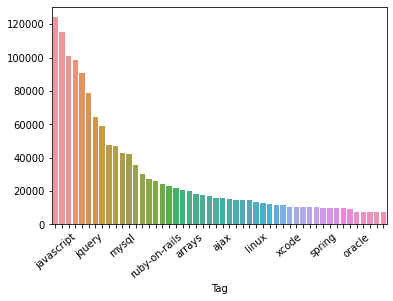

In [15]:
top_fifty_tags_barplot = sns.barplot(x=top_fifty_tags.index, y=top_fifty_tags.values)
for i, label in enumerate(top_fifty_tags_barplot.xaxis.get_ticklabels()):
    if i % 5 != 0:
        label.set_visible(False)
plt.xticks(rotation=40)
top_fifty_tags_barplot

In [18]:
pd.options.display.float_format = "{:.2f}%".format
100 * tag_value_counts.head(50).cumsum() / tag_value_counts.sum()

Tag
javascript        3.31%
java              6.38%
c#                9.08%
php              11.72%
android          14.13%
jquery           16.23%
python           17.95%
html             19.52%
c++              20.79%
ios              22.05%
mysql            23.18%
css              24.31%
sql              25.26%
asp.net          26.06%
objective-c      26.78%
ruby-on-rails    27.47%
.net             28.11%
c                28.73%
iphone           29.30%
angularjs        29.85%
arrays           30.37%
sql-server       30.86%
json             31.33%
ruby             31.78%
r                32.20%
ajax             32.62%
regex            33.03%
xml              33.42%
node.js          33.81%
asp.net-mvc      34.19%
linux            34.55%
django           34.89%
wpf              35.22%
database         35.53%
swift            35.85%
xcode            36.13%
string           36.41%
excel            36.69%
vb.net           36.96%
windows          37.23%
spring           37.50%
wordpress   

The top 4000 tags cover almost 90% of the questions in the dataset.
The top 50 tags cover almost 40% of the questions in the dataset.

#### Joining Questions with Tags

In [19]:
# standardize column names
for df in [questions_df, tags_df]:
    df.columns = df.columns.str.lower()

In [20]:
# group rows per question id
tags_per_question_df = tags_df.groupby(['id'])['tag'].apply(list)

In [21]:
tags_per_question_df.head()

id
80                           [flex, actionscript-3, air]
90     [svn, tortoisesvn, branch, branching-and-merging]
120                              [sql, asp.net, sitemap]
180    [algorithm, language-agnostic, colors, color-s...
260         [c#, .net, scripting, compiler-construction]
Name: tag, dtype: object

In [22]:
# we are only interested in text column(s) from `questions_df`
df = questions_df[["id", "title", "body"]].merge(tags_per_question_df.to_frame(), on="id")

In [23]:
df["tag_count"] = df["tag"].apply(len)

In [24]:
df.head()

,id,title,body,tag,tag_count
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"[flex, actionscript-3, air]",3
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"[svn, tortoisesvn, branch, branching-and-merging]",4
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net, sitemap]",3
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,"[algorithm, language-agnostic, colors, color-s...",4
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net, scripting, compiler-construction]",4


#### Minimum, maximum and average tags per question

In [25]:
min_tag_count = df["tag_count"].min()
max_tag_count = df["tag_count"].max()
avg_tag_count = df["tag_count"].mean()

In [26]:
print(f"Each question has a minimum of {min_tag_count} tag and a maximum of {max_tag_count} tags. \
The average number of tags per question is {avg_tag_count:.2f}.")

Each question has a minimum of 1 tag and a maximum of 5 tags. The average number of tags per question is 2.97.


### Export dataframe for further preprocessing

In [27]:
df.to_pickle(f"{data_dir}/eda.pkl")